In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.matlib

# data file locations
data_files = ["data/mb1/datafile-b'26.25'-1.txt",
              "data/mb1/datafile-b'26.25'-2.txt",
              "data/mb1/datafile-b'26.00'-3.txt",
              "data/mb1/datafile-b'25.00'-4.txt",
              "data/mb1/datafile-b'26.50'-5.txt"]

In [73]:

# read bytes from files
byte_files, number_files = [], []
for file_link in data_files:
    with open(file_link, "rb") as file:
        byte_files.append(file.read()) # list of files with butes stored as python bytes objects
        number_files.append(np.array(list(byte_files[-1]))) # represent each byte with a base-10 number between 0-255

130375
130344
130344
130371
130325


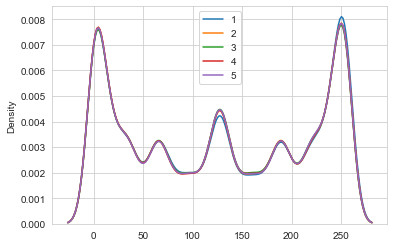

In [74]:

# plot the frequency density of all numbers (1 byte, 0-255) stored in the SRAM
sns.set_style('whitegrid')
for numbers in number_files:
    sns.kdeplot(numbers)
    print(len(numbers))
plt.legend(1+np.array(range(len(data_files))))
plt.savefig("figs/sram-frequency-density.pdf")

In [79]:
# find which numbers are different between runs on the same board

prev_file = number_files[0][:13000]
prev_mask = np.matlib.repmat(True, 1, 13000)
for file in number_files:
    file = file[:13000]
    mask = np.equal(file, prev_file)
    prev_mask = np.bitwise_and(mask, prev_mask)

prev_mask.T

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [56]:
read_bytes = []
with open("data/mb1/datafile-b'26.25'-1.txt", 'rb') as f:
    while byte := f.read(1):
        read_bytes.append(format(int.from_bytes(byte, "little"), '08b'))